In [1]:
# Works best with jupyter-notebook

In [59]:
%matplotlib notebook 
#%matplotlib widget 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import roboticstoolbox as rtb
import spatialmath.base as sm
import matplotlib.pyplot as plt
from math import pi
import time
from spatialmath import *
from spatialmath.base import *
from collections import namedtuple
from roboticstoolbox import *
np.set_printoptions(linewidth=100, formatter={'float': lambda x: f"{x:8.4g}" if abs(x) > 1e-10 else f"{0:8.4g}"})

##### Lecture 9.9

Non-square Jacobians

In [90]:
puma = rtb.models.ETS.Puma560() #make use of puma560
puma_3x = puma.ets() * puma.ets() * puma.ets() #extract the ets and connect 3 of them

In [91]:
q = math.pi*np.random.rand(18) #6dof *3 = 18
q

array([   2.024,    1.241,    3.014,     1.34,    2.441,   0.8301,    2.114,    3.074,   0.4115,
          1.103,    2.867,    2.053,    2.063,    1.557,    1.155,      1.5,    2.193,   0.7217])

In [92]:
puma_3x.eval(q)

SE3:  -0.374307    0.217399   -0.901461   -0.0186633    
       0.0705494   0.975989    0.206079    0.54407      
       0.924617    0.0135392  -0.380657    1.17756      
       0           0           0           1            
    

In [93]:
robot = rtb.robot.ERobot(puma_3x) #construct a robot using the 18dof ets

<IPython.core.display.Javascript object>


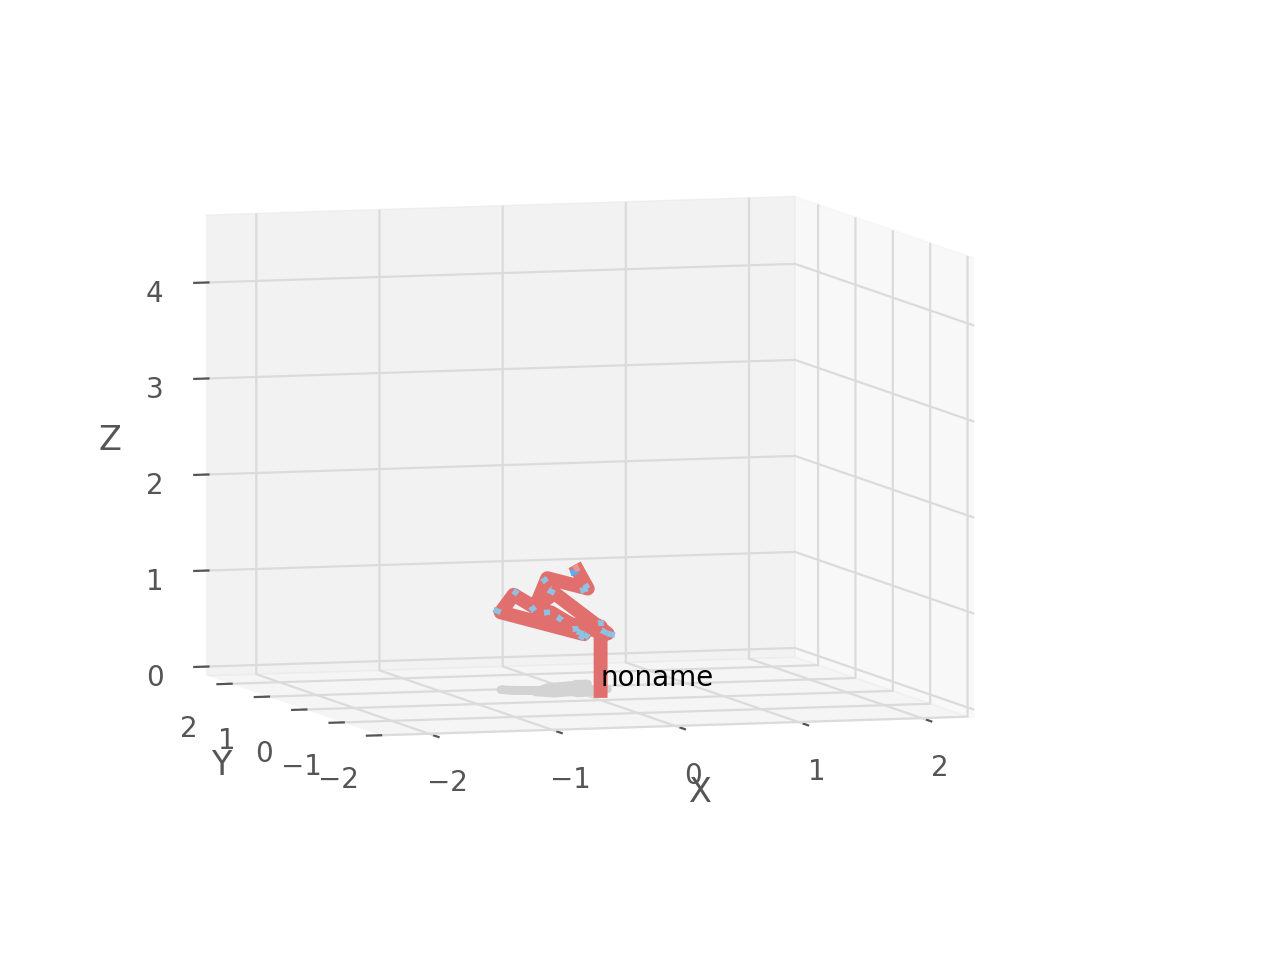

In [94]:
robot.plot(q,backend='pyplot')

In [98]:
jacob0 = robot.jacob0(q)
jacob0

array([[ -0.5441,  -0.2214,  -0.1686,  -0.2062,   0.6757,  -0.1116, -0.00219,  -0.3615,   -0.564,
           0.154,   -0.593,  -0.2571,  -0.3594,   0.4816,   0.1354,  0.07148,   0.1353,  0.04348],
       [-0.01866,   0.4545,   0.3461,  -0.2828,   0.1143,   0.5415,    0.638,    0.464,   0.1028,
         -0.5252, -0.005678,   0.4211,   0.3294,  -0.1829,  -0.1797,  -0.1358, -0.03094,   0.1952],
       [       0,  -0.4973, -0.08218,   0.3334,  -0.2668,  -0.5256,  -0.3888,    0.392,   0.2677,
          0.3969,  -0.1077,  -0.3434,  -0.4887,  -0.5126,  -0.2537,   0.0393,  0.05715, 0.002708],
       [       0,   -0.899,   -0.899,    0.393,  -0.3934,  -0.8364,  -0.8364,   0.3108,   0.3108,
          0.9397,  0.01255,  -0.8118,  -0.8118,  -0.4901,  -0.4901,   0.8703, -0.08408,  -0.9015],
       [       0,  -0.4379,  -0.4379,  -0.8068,   0.2861,   0.2831,   0.2831,  -0.4604,  -0.4604,
          0.0174,  -0.9998, -0.01976, -0.01976,   0.5664,   0.5664,    0.361,   0.7793,   0.2061],
       [      

In [99]:
np.linalg.matrix_rank(jacob0)

6

In [100]:
np.linalg.inv(jacob0)

LinAlgError: Last 2 dimensions of the array must be square

In [101]:
np.linalg.pinv(jacob0) #pesudo inverse

array([[ -0.2703,  -0.4443, -0.08642,  -0.0964,   0.1037,   0.1864],
       [-0.02821,   0.1596,  -0.3265,  0.05413,  -0.1565, -0.07019],
       [ 0.04873, -0.01331,   0.3878,  -0.2958,  -0.1152, -0.03354],
       [-0.08128,  -0.1638,   0.1703,  -0.1067,  -0.1726, -0.09845],
       [  0.6208,   0.2091,  -0.1229,  0.04283,  -0.2314,  0.03601],
       [ -0.1794,   0.3288,  -0.2672,   0.1376,   0.1364, -0.05902],
       [0.008787,   0.4798,  -0.0363,   0.0937,  0.09972, -0.03808],
       [-0.04175,    0.699,   0.3677,   0.1503,  0.05073, -0.07466],
       [ -0.2485,  0.02975,   0.1184,  0.01537,  0.04671,  0.02627],
       [ 0.06184,  -0.2148,  0.04565,  0.02189, -0.01853,  0.03461],
       [ -0.3888,  -0.0791,  -0.3754,   0.1032,  -0.1489,  -0.1488],
       [ 0.02189, -0.04974, -0.09582, -0.07794, -0.03305,    0.108],
       [ -0.1424,  -0.2008,  -0.3452, -0.02749, -0.008704,  0.09682],
       [  0.3466,   -0.443,  -0.4654, -0.04616,  -0.1394,   0.1581],
       [ -0.9965,  0.06174,   0.2

In [105]:
import scipy
scipy.linalg.null_space(jacob0) 

array([[  0.1395, -0.08491,  -0.3587, 0.005515,  -0.5037,  -0.1217,  -0.2564,   0.2037,   0.1672,
         0.06729,   0.1307,   0.2786],
       [ -0.3658,   0.0645,  0.08798,   0.3725, -0.03891,  -0.3512,  -0.3703,    -0.22,  0.07905,
          0.3705, -0.01934, -0.01535],
       [-0.09244,  -0.5203,  -0.1681,  0.05417,  0.07427,   0.0156,   0.2127,   0.4516,   0.2131,
          0.1455,  0.06704,  -0.3031],
       [   0.303,   0.2894,  0.02529, -0.04513,   -0.355,  0.04918, 0.002471, -0.03157,  -0.3439,
          0.2686,   0.2552,  -0.4197],
       [ 0.07334, -0.02746,   0.1126, -0.01867,  -0.3601,   0.1088,   0.1083, -0.05439,   0.3014,
        -0.03372,   0.5205,   0.3163],
       [ -0.1482,  -0.0745, -0.00861,   0.1292,  -0.1969, -0.009869,  -0.0649,   0.1048,  -0.4145,
         -0.5789,   0.2567,  -0.3074],
       [  0.8003, -0.05509,  0.02342,    0.144,   0.1415,  -0.1345,  -0.1034,  -0.0358,  0.02875,
          0.1099,  -0.1285, -0.05944],
       [ -0.1433,   0.5867,  -0.1601,  0